# **Veriye İlk Bakış**

In [2]:
import seaborn as sns
planets = sns.load_dataset("planets")
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


### **Veri Setinin Hikayesi Nedir?**

Veriye ilk bakış demek teorik olarak verisetinin nasıl oluştuğunun sorgulanmasıdır.

Bu veriseti NASA'nın yayınladığı galaksi keşfi ile ilgili bir veri setidir.<br>
* **method:** gezegenlerin/galaksilerin bulunma şeklini ifade etmektedir.
* **number:** bulunan sistemlerdeki gezegen sayısını ifade etmektedir.
* **orbital_period:** yörünge dönemini ifade etmektedir.
* **mass:** kütleyi ifade etmektedir.
* **distance:** uzaklığı ifade etmektedir.
* **year:** bulunma yılını ifade etmektedir.

In [3]:
df = planets.copy()
#Orjinal verisetini yedekleyerek yedek üzerinde işlemler yapacağız.

In [4]:
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
df.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


### **Veri Seti Yapısal Bilgileri**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


**object**'i gördüğümüz zaman bunun bir kategorik değişken olduğunu düşüneceğiz.<br>
object dışında diğer tüm değişkenler ise kesikli ve sürekli olan sayısal değişkenlerdir.

In [10]:
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

**object tipindeki değişkeni Categorical tipine dönüştürmeliyiz.**

In [11]:
import pandas as pd
df.method = pd.Categorical(df.method)

In [13]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

# **Veri Setinin Betimlenmesi**

In [1]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()

In [4]:
df.shape #degisken ve gözlem sayısı

(1035, 6)

In [5]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [13]:
df.describe().T
#describe eksik gözlemleri göz ardı eder ve kategorik değişkenleri dışarıda bırakır.

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [12]:
df.describe(include = "all").T #kategorik değişkenleri de dahil eder ancak anlamlı sonuç çıkmaz.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
method,1035,10,Radial Velocity,553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number,1035,NaN,NaN,NaN,1.78551,1.24098,1,1,1,2,7
orbital_period,992,NaN,NaN,NaN,2002.92,26014.7,0.0907063,5.44254,39.9795,526.005,730000
mass,513,NaN,NaN,NaN,2.63816,3.81862,0.0036,0.229,1.26,3.04,25
distance,808,NaN,NaN,NaN,264.069,733.116,1.35,32.56,55.25,178.5,8500
year,1035,NaN,NaN,NaN,2009.07,3.97257,1989,2007,2010,2012,2014


# **Eksik Değerlerin İncelenmesi**

In [3]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [5]:
#hiç eksik gözlem(değer) var mı?
df.isnull().values.any()

True

In [6]:
#Hangi değişkende kaçar tane eksik değer var?
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [9]:
#Eksik değerleri 0 ile doldurmak.
df["orbital_period"].fillna(0, inplace=True)

In [10]:
#orbital_period değişkenindeki eksik değerleri doldurduk.
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

Eksik veri doldurma işlemi çok tehlikelidir. Veri setinin yapısını bozabilir.

In [15]:
#Ortalama ile eksik değer doldurma
df["mass"].fillna(df.mass.mean(), inplace = True)

In [18]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

In [19]:
#Veri setindeki tüm eksik değerlerin yerine ortalamalarının atanması
df.fillna(df.mean, inplace = True)

In [20]:
df.isnull().sum()

method            0
number            0
orbital_period    0
mass              0
distance          0
year              0
dtype: int64

Eksik değerleri doldurarak veri setinin yapısını bozduk.<br>
Copy metodu ile işlemleri geri alalım.

In [21]:
df = planets.copy()

In [22]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

# **Kategorik Değişken Özetleri**

In [24]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


### **Sadece Kategorik Değişkenler ve Özetleri**

In [28]:
#Kategorik değişkeni seçmek.
kat_df = df.select_dtypes(include = ["object"])
kat_df.head()

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


### **Kategorik Değişkenlerin Sınıflarına ve Sınıf Sayısına Erişmek**

In [29]:
#Değişkenin içerisindeki sınıf bilgileri
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [31]:
#Değişkenimizin kaç adet sınıfı olduğu
kat_df["method"].value_counts().count()

10

### **Kategorik Değişkenin Sınıflarının Frekanslarına Erişmek**

In [32]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

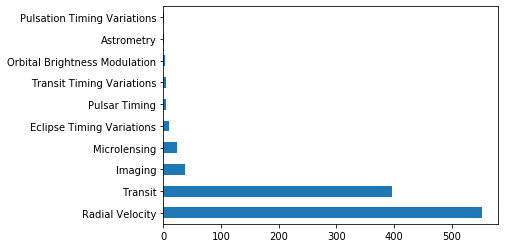

In [37]:
#Sınıfların frekanslarını sütun grafiği şeklinde görelim
df["method"].value_counts().plot.barh(); # ";" bilgi satırını kapatır.

# **Sürekli Değişken Özetleri**

In [3]:
import seaborn as sns
planets = sns.load_dataset("planets")
df = planets.copy()
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [6]:
df_num = df.select_dtypes(include = ["float64", "int64"])

In [4]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [5]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [7]:
#Sadece belirli bir değişkenin betimsel istatistiği
df_num["distance"].describe()

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [12]:
print("Ortalama: "+ str(df_num["distance"].mean()))
print("Dolu Gözlem Sayısı: "+ str(df_num["distance"].count()))
print("Maks. Değer: "+ str(df_num["distance"].max()))
print("Min. Değer: "+ str(df_num["distance"].min()))
print("Medyan: "+ str(df_num["distance"].median()))
print("Standart Sapma: "+ str(df_num["distance"].std()))

Ortalama: 264.06928217821786
Dolu Gözlem Sayısı: 808
Maks. Değer: 8500.0
Min. Değer: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404421


# **Dağılım Grafikleri**

### **Barplot** (Sütun Grafiği)

Sütun grafikler, elimizdeki categoric değişkenleri görselleştirmek için kullanılır.

**Veri Setinin Hikayesi**

* price: dolar cinsinden fiyat (326-18,823)
* carat: ağırlık (0.2-5.01)
* cut: kalite (Fair, Good, Very Good, Premium, Ideal)
* color: renk (from J(worst) to D(best))
* clarity: temizliği, berraklığı (I1(worst), SI2, VS2, VS1, VVS2, VVS1, IF(best))
* x: length in mm (0-10.74)
* y: width in mm (0-58.9)
* z: depth in mm (0-31.8)
* depth: toplam derinlik yüzdesi = z / mean(x, y) = 2 * z / (x+y) (43-79)
* table: elmasın en geniş noktasına göre genişliği (43-79)

In [1]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Veri Setine Hızlı Bakış**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [9]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
df["cut"].value_counts() #degiskendeki gozlemlerin frekansı

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [14]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

Kategorik değişken görselleştirmek üzere ele aldığımız sütun grafiği işlemlerimize devam edeceğiz. Fakat şöyle bir problemimiz var; <br>elimizdeki veri setinin içerisindeki kategorik değişkenlerin nominal değil ordinal olduğunu gözlemliyoruz. <br>Sınıflar arasında kötüden iyiye gibi bir sıralama var.<br>Bizim bunu Python programlama diline ifade etmemiz lazım.<br>
Buradaki kategorik değişkenlerin type'ni ordered(sıralı) bir şekilde programa tanıtmalıyız.

In [3]:
#Ordinal tanımlama
from pandas.api.types import CategoricalDtype

In [16]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: object

In [18]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))
#cut değişkeninin tipini kategorik değişkene dönüştür.
#Ve bunu sıralı(ordinal) şekilde yap.

In [19]:
df.dtypes

carat       float64
cut        category
color        object
clarity      object
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [20]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Ideal < Premium < Very Good]

**cut** değişkeninin ordinal olduğunu tanıttık fakat sıralamayı yanlış yaptı.<br>
Sıralama bilgisini de vermemiz gerekiyor.

In [21]:
cut_kategoriler = ["Fair", "Good", "Very Good", "Premium", "Ideal"]

In [22]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))

In [24]:
df.cut.head(1)
#Doğru sıralamaya ulaştık.

0    Ideal
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

Sütun grafiği oluşturmak üzere bölüme başladık, fakat tıpkı gerçek hayatta olduğu gibi elimizdeki veri<br>
(hazır bir kütüphaneden çektiğimiz halde) doğru bir formda değil. Kullanacak olduğumuz fonksiyonlara <br>
göndermek üzere hazır değil. Dolayısıyla bütün görselleştirme teknikleri işin en kolay kısmı. Zor olan<br>
kısmı ise bu detaylardaki teknik bazı zorlukların farkında olmak ve bunları giderecek yöntemleri bilmek.

In [25]:
df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [28]:
color_kategoriler = ["J", "I", "H", "G", "F", "E", "D"]
df.color = df.color.astype(CategoricalDtype(categories = color_kategoriler, ordered = True))
df.color.head(1)
#Doğru sıralamaya ulaştık.

0    E
Name: color, dtype: category
Categories (7, object): [J < I < H < G < F < E < D]

In [29]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [6]:
#(I1(worst), SI2, VS2, VS1, VVS2, VVS1, IF(best))
clarity_kategoriler = ["I1", "SI2", "VS2", "VS1", "VVS2", "VVS1", "IF"]
df.clarity = df.clarity.astype(CategoricalDtype(categories = clarity_kategoriler, ordered = True))
df["clarity"].head(1)
#Doğru sıralamaya ulaştık.

0    SI2
Name: clarity, dtype: category
Categories (7, object): [I1 < SI2 < VS2 < VS1 < VVS2 < VVS1 < IF]

**Veri setinin hikayesi**, **veri setine ilk adımın atılması** ve **veri setinin görselleştirmeye hazır hale getirilmesi**<br>
işlemlerini gerçekleştirmiş olduk.

#### **Bar Plot (Sütun Grafiğin) Oluşturulması**

In [9]:
df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

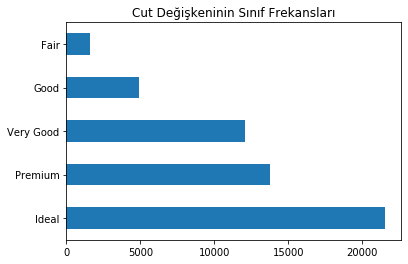

In [10]:
df["cut"].value_counts().plot.barh().set_title("Cut Değişkeninin Sınıf Frekansları");

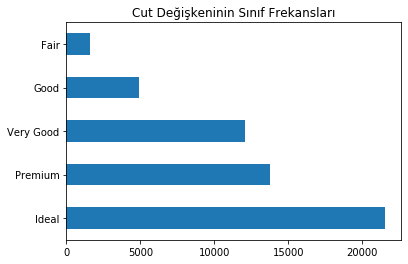

In [11]:
(df["cut"]
 .value_counts()
 .plot.barh()
 .set_title("Cut Değişkeninin Sınıf Frekansları"));

In [12]:
import seaborn as sns

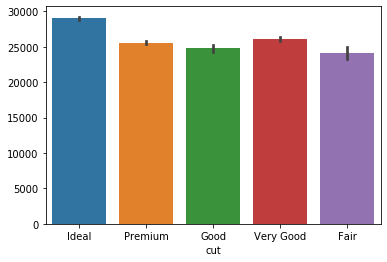

In [15]:
sns.barplot(x = "cut", y = df.cut.index, data=df);

### **Sütun Grafik Çaprazlamalar**

Bu bölümlerde ele aldığımız uygulamalar artık grafiklerin teknik özelliklerinin yanında <br>
bize daha detaylı, veriye değil de bilgiye erişmek için kullanacak olduğumuz yaklaşımlardır.

In [22]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
cut_kategoriler = ["Fair","Good","Very Good", "Premium", "Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [23]:
color_kategoriler = ["J", "I", "H", "G", "F", "E", "D"]
df.color = df.color.astype(CategoricalDtype(categories = color_kategoriler, ordered = True))
df.color.head(1)

0    E
Name: color, dtype: category
Categories (7, object): [J < I < H < G < F < E < D]

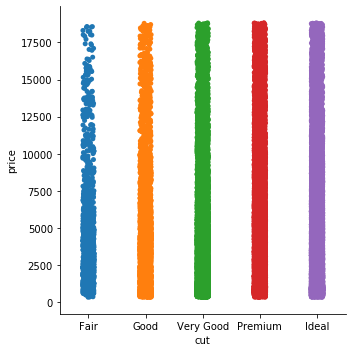

In [24]:
sns.catplot(x="cut", y="price", data=df);
#catplot grafiği ketagorik değişken çaprazlamak için kullanılır.

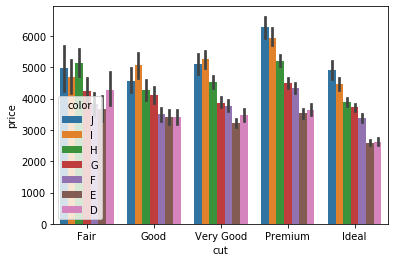

In [25]:
sns.barplot(x = "cut", y = "price", hue = "color", data=df);
#Bu grafik cut ve color'a göre gruplama yapar. Price değerlerinin ortalamasını ve std gösterir.

Grafikteki verileri doğrulayalım.

In [26]:
df.groupby(["cut", "color"])["price"].mean().unstack()

color,J,I,H,G,F,E,D
cut,,,,,,,
Fair,4975.655462,4685.445714,5135.683168,4239.254777,3827.003205,3682.312500,4291.061350
Good,4574.172638,5078.532567,4276.254986,4123.482204,3495.750275,3423.644159,3405.382175
Very Good,5103.513274,5255.879568,4535.390351,3872.753806,3778.820240,3214.652083,3470.467284
Premium,6294.591584,5946.180672,5216.706780,4500.742134,4324.890176,3538.914420,3631.292576
Ideal,4918.186384,4451.970377,3889.334831,3720.706388,3374.939362,2597.550090,2629.094566


### **Histogram ve Yoğunluk Grafiği**

Histogram ve yoğunluk grafikleri sayısal değişkenlerin dağılımını <br>
ifade etmek için kullanılan veri görselleştirme teknikleridir.

In [4]:
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


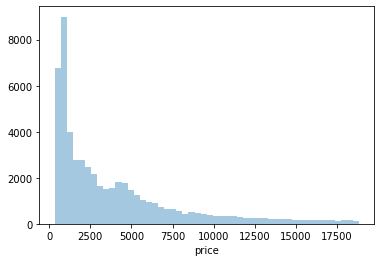

In [11]:
sns.distplot(df.price, kde=False);
#kde yoğunluk gösterir.

İki tepeli bir yapı oluştu. Bu çarpıklık olduğunu gösterir.

In [25]:
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

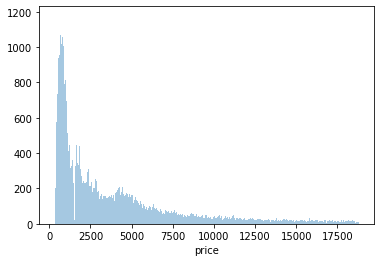

In [16]:
sns.distplot(df.price, bins = 500, kde=False);
#bins: histogramdaki çubuk sayısı

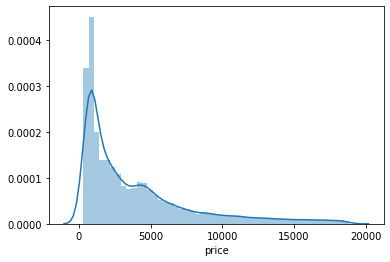

In [17]:
sns.distplot(df.price);
#histogram ve yoğunluk grafiği birlikte

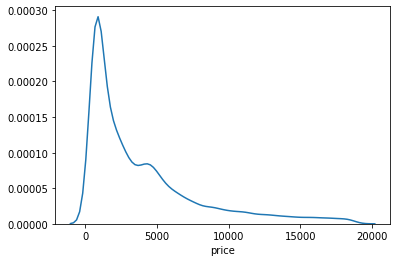

In [22]:
sns.distplot(df.price, hist = False);
#Sadece yoğunluk grafiği

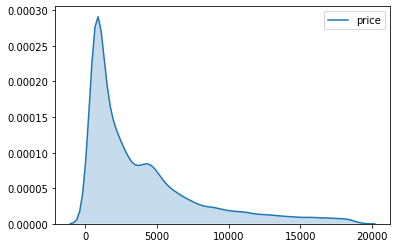

In [19]:
sns.kdeplot(df.price, shade = True);
#yoğunluk grafiğinin altını doldurarak oluşturduk.

### **Histogram ve Yoğunluk Çaprazlamalar**

In [28]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
cut_kategoriler=["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories=cut_kategoriler, ordered=True))
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): [Fair < Good < Very Good < Premium < Ideal]

In [29]:
color_kategoriler = ["J", "I", "H", "G", "F", "E", "D"]
df.color = df.color.astype(CategoricalDtype(categories = color_kategoriler, ordered = True))
df.color.head(1)

0    E
Name: color, dtype: category
Categories (7, object): [J < I < H < G < F < E < D]

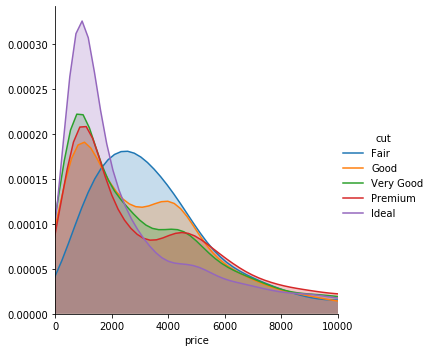

In [31]:
(sns
 .FacetGrid(df,
           hue="cut",
           height=5,
           xlim=(0,10000)) #x ekseninin bas.-bitis degerleri
 .map(sns.kdeplot, "price", shade=True)
 .add_legend() #kategorik bilgiler için
);

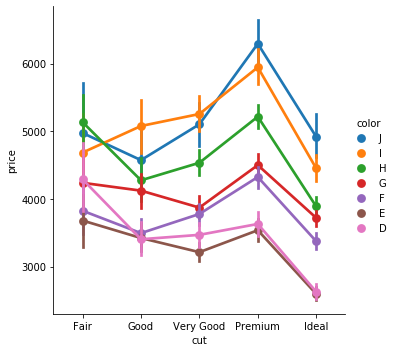

In [30]:
sns.catplot(x="cut", y="price", hue="color", kind="point", data=df);

## **Boxplot**

#### **Veri Seti Hikayesi**

**total_bill:** yemeğin toplam fiyatı (bahşiş ve vergi dahil)<br>
**tip:** bahşiş<br>
**sex:** ücreti ödeyen kişinin cinsiyeti (0=male, 1=female)<br>
**smoker:** grupta sigara içen var mı? (0=No, 1=Yes)<br>
**day:** gün (3=Thur, 4=Fri, 5=Sat, 6=Sun)<br>
**time:** ne zaman? (0=Day, 1=Night)<br>
**size:** grupta kaç kişi var?

In [4]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [6]:
df.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [7]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [8]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [9]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

#### **Boxplot**

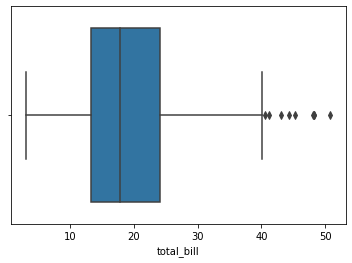

In [14]:
sns.boxplot(x = df["total_bill"]);

Boxplot, bir değerin aykırı değer olarak tanımlanması için<br>
bize en fazla yardımı dokunacak araçlardan birisidir.

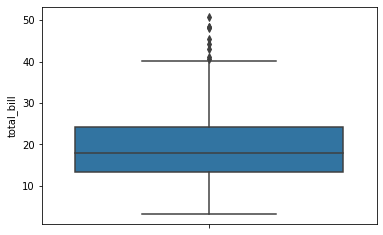

In [16]:
sns.boxplot(x = df["total_bill"], orient="v");
#dikey gözlem
#sns.boxplot(y = df["total_bill"]); ile da yapabiliriz.

#### **Boxplot Caprazlamalar**

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


Hangi günler daha fazla kazanıyoruz?

In [48]:
df.groupby("day")["total_bill"].describe().T

day,Thur,Fri,Sat,Sun
count,62.000000,19.000000,87.000000,76.000000
mean,17.682742,17.151579,20.441379,21.410000
std,7.886170,8.302660,9.480419,8.832122
min,7.510000,5.750000,3.070000,7.250000
25%,12.442500,12.095000,13.905000,14.987500
50%,16.200000,15.380000,18.240000,19.630000
75%,20.155000,21.750000,24.740000,25.597500
max,43.110000,40.170000,50.810000,48.170000


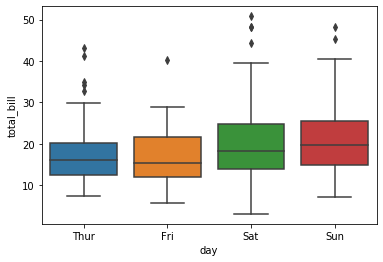

In [22]:
sns.boxplot(x="day", y="total_bill", data=df);

Sabah mı Akşam mı daha çok kazanıyoruz?

In [47]:
df.groupby(["time"])["total_bill"].describe().T

time,Lunch,Dinner
count,68.000000,176.000000
mean,17.168676,20.797159
std,7.713882,9.142029
min,7.510000,3.070000
25%,12.235000,14.437500
50%,15.965000,18.390000
75%,19.532500,25.282500
max,43.110000,50.810000


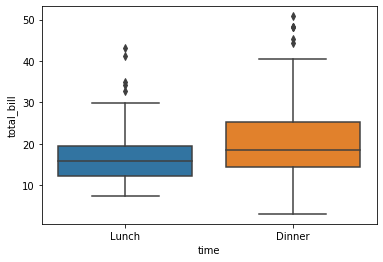

In [37]:
sns.boxplot(x="time", y="total_bill", data=df);

Kişi sayısına göre ödenen fiyat

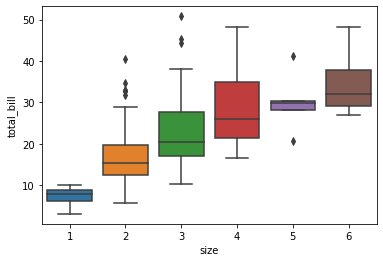

In [49]:
sns.boxplot(x="size", y="total_bill", data=df);

Cinsiyet ve günlere göre ödenen fiyat

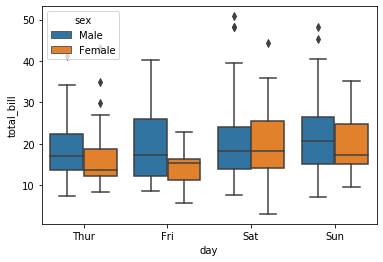

In [58]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=df);

#### **Violin Grafiği**

In [59]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


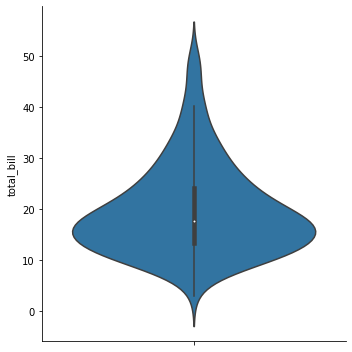

In [61]:
sns.catplot(y = "total_bill", kind = "violin", data=df);

#### **Violin Grafik Çaprazlamalar**

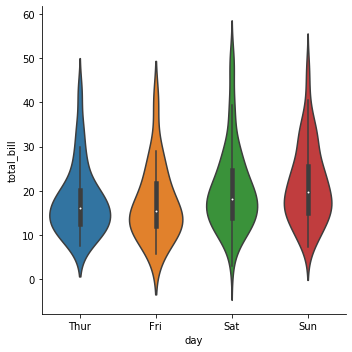

In [66]:
sns.catplot(x="day", y="total_bill", kind="violin", data=df);

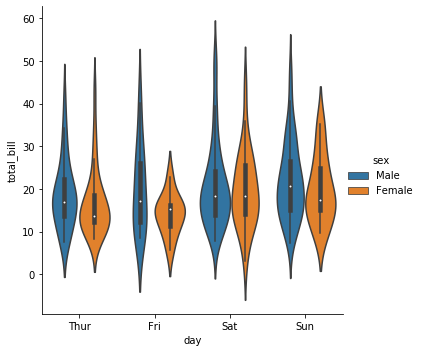

In [67]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", data=df);